In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Benchmark

Here data analysis from data collectes through experiments showed in the other notebooks. In a first moment will be showed the behaviour for the three different method separetely and in the end there will be a comparison bwtween them

## Parallelized processe, dataframe in local machine.

In [2]:
for i in range(1, 9):
    file_name = f'results_df_{i}.csv'  
    
    variable_name = f'df_results_{i}'
    locals()[variable_name] = pd.read_csv(file_name)

Transormation of the results into a matrix to plot the heat-map.

In [3]:


num_partitions = [1,2,4,6,8,10,12,14,16,18,20,22,34,36,38,64]
num_cores = [1, 2, 3, 4, 5, 6, 7, 8]


execution_times_list = []


for i in range(len(num_partitions)):
    execution_times_list.append(np.array([df_results_1['Execution time (s)'][i], df_results_2['Execution time (s)'][i], 
                                          df_results_3['Execution time (s)'][i], df_results_4['Execution time (s)'][i], 
                                          df_results_5['Execution time (s)'][i], df_results_6['Execution time (s)'][i], 
                                          df_results_7['Execution time (s)'][i], df_results_8['Execution time (s)'][i]]))

# Converte la lista in una matrice 2D 
execution_times = np.array(execution_times_list)





### Heat-map
The heat map shows the behaviour of the algorithm varying number of partition and number of cores. This are main observation: 
* Time execution in 1 core grows faster than the other cases. 
* If the heat-map is observed horizontally, time execution values has a similar decreasing as a function of cores, except for 1 partition fixed and number of cores varying.
* Instead observing the heat-map vertically we can se that with fixed number of core, time execution values present a briefly oscillation in the beginning and then a linear growth, but it is more evident in the scatter plot below.

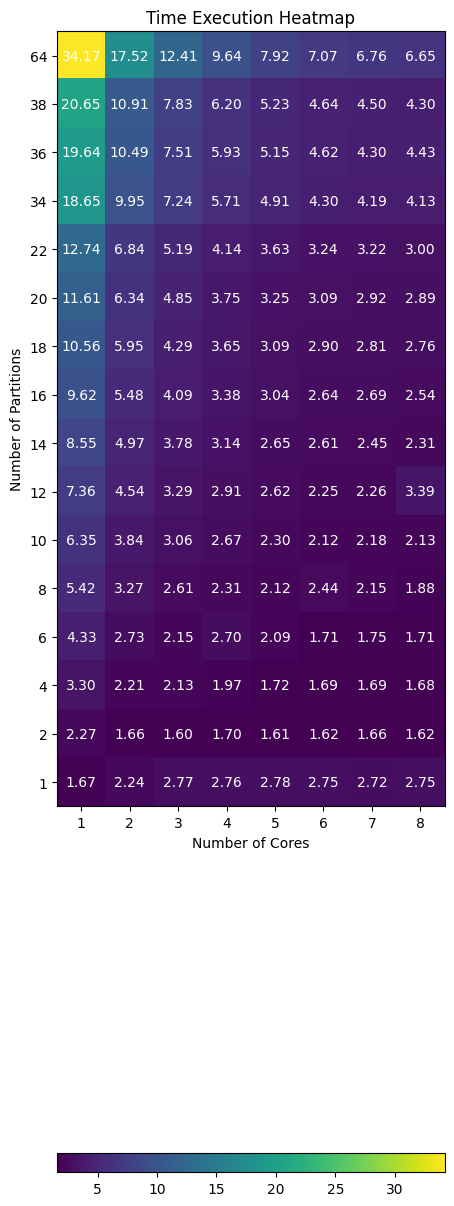

In [4]:

num_partitions1 = num_partitions

num_partitions2 = num_partitions1[::-1]


execution_times1 = execution_times[::-1]

plt.figure(figsize=(5, 30))
plt.imshow(execution_times1, cmap='viridis', interpolation='nearest')



plt.yticks(np.arange(len(num_partitions2)), num_partitions2)
plt.xticks(np.arange(len(num_cores)), num_cores)


plt.xlabel('Number of Cores')
plt.ylabel('Number of Partitions')


plt.title('Time Execution Heatmap')


for i in range(len(num_partitions1)):
    for j in range(len(num_cores)):
        plt.text(j, i, f'{execution_times1[i][j]:.2f}', ha='center', va='center', color='white')

plt.colorbar(orientation='horizontal')

# Mostra la heatmap
plt.show()



Dataframe concatenation

In [5]:
df_tot=pd.concat([df_results_1,df_results_2,df_results_3,df_results_4,
                  df_results_5,df_results_6,df_results_7,df_results_8])

df_tot



,Partition,Execution time (s),Time standard deviation (s),Mean Cost Function,Mean Cost Function standard deviation,Number of cores
0,1,1.673424,0.050404,2.801444,0.215811,1
1,2,2.268008,0.054830,2.625222,0.123924,1
2,4,3.303739,0.014049,2.703667,0.181032,1
3,6,4.329588,0.014511,2.911333,0.142647,1
4,8,5.422429,0.059375,2.895000,0.247082,1
...,...,...,...,...,...,...
11,22,3.002996,0.044667,2.818667,0.206740,8
12,34,4.127268,0.031526,2.769667,0.101183,8
13,36,4.433630,0.172674,2.706444,0.291158,8
14,38,4.304115,0.087328,2.724667,0.049095,8


### Scatterplot of mean cost function vs partition
Unfortunately this plot did not show any kind of trend, maybe the fact that all data with different cores are showed in the same plot can suggest that there could be a trand, but if one plot data divided can observe that there is no trend. 

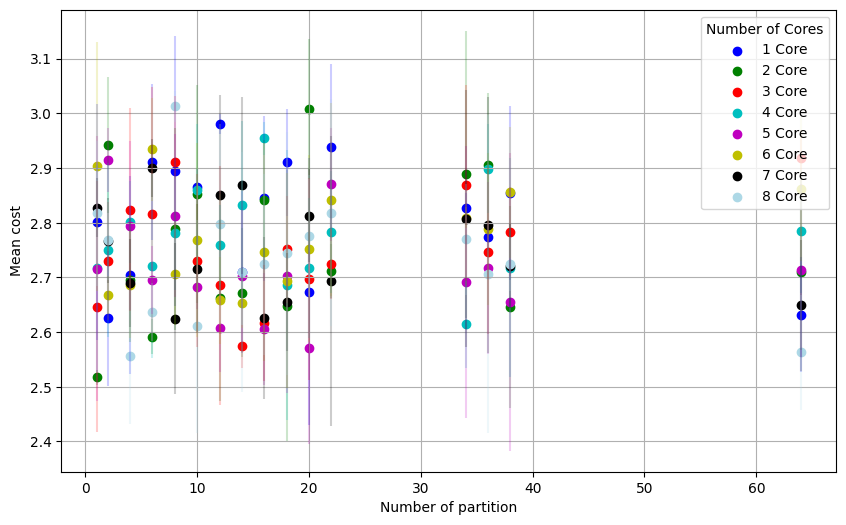

In [6]:
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lightblue']

plt.figure(figsize=(10, 6))
for core, group in df_tot.groupby("Number of cores"):
    partition = group["Partition"]
    mean_cost = group["Mean Cost Function"]
    std_dev = group["Mean Cost Function standard deviation"]
    
    plt.scatter(partition, mean_cost, label=f'{core} Core', c=colors[int(core)-1], marker='o')
    plt.errorbar(partition, mean_cost, yerr=std_dev, fmt='none', c=colors[int(core)-1],alpha=0.2)
   
plt.xlabel("Number of partition")
plt.ylabel("Mean cost")
plt.legend(title="Number of Cores")

# Mostra il plot
plt.grid()
plt.show()


### Scatter-plot time execution vs number of partition
In this case there is a clear trend that was suggested by heat-map showed before.


The behaviour of data shows that with one core the time execution is higher than other values, than present a minimum aroud 2,4,6 partitions and then it starts growing linearly with different slope depending on the number of cores committed to analyze data.

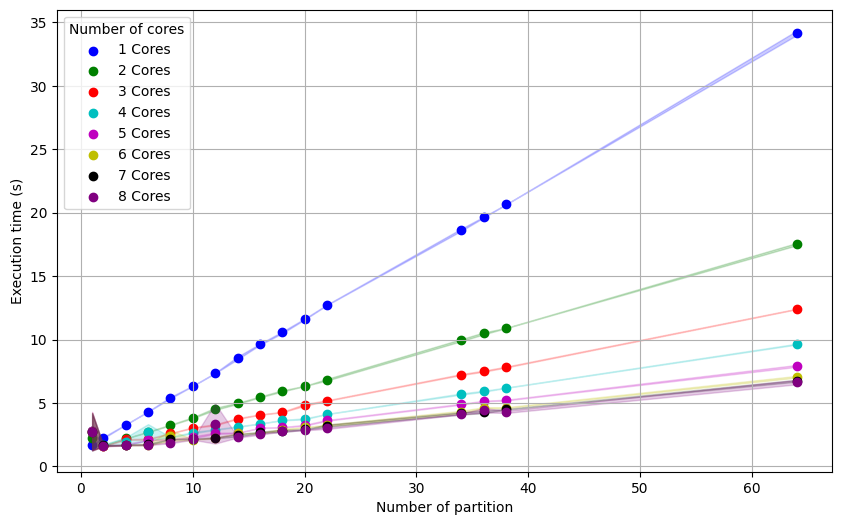

In [7]:
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']

plt.figure(figsize=(10, 6))
for core, group in df_tot.groupby("Number of cores"):
    partition = group["Partition"]
    execution_time = group["Execution time (s)"]
    std_dev = group["Time standard deviation (s)"]
    
    plt.scatter(partition, execution_time, label=f'{core} Cores ', c=colors[int(core)-1])
    
    # Calcola i limiti della banda di errore
    lower_bound = execution_time - std_dev
    upper_bound = execution_time + std_dev
    
    # Aggiungi la banda di errore al grafico
    plt.fill_between(partition, lower_bound, upper_bound, color=colors[int(core)-1], alpha=0.2)

plt.xlabel("Number of partition")
plt.ylabel("Execution time (s)")
plt.legend(title="Number of cores")

# Mostra il plot
plt.grid()
plt.show()

# Parallelized data with Spark Data Frame and parallelized processes.
The description of trend behaviour of data are the same as before so they will not be commented again. They are show in any case to enfatize the fact that with different approach the trend is the same.

In [8]:
for i in range(1, 9):
    file_name = f'results_df_spark_{i}.csv'  
    
    variable_name = f'df_spark_{i}'
    locals()[variable_name] = pd.read_csv(file_name)

In [9]:


num_partitions = [1,2,4,6,8,10,12,14,16,18,20,22,34,36,38,64]
num_cores = [1, 2, 3, 4, 5, 6, 7, 8]


execution_times_list = []


for i in range(len(num_partitions)):
    execution_times_list.append(np.array([df_spark_1['Execution time (s)'][i], df_spark_2['Execution time (s)'][i], 
                                          df_spark_3['Execution time (s)'][i], df_spark_4['Execution time (s)'][i], 
                                          df_spark_5['Execution time (s)'][i], df_spark_6['Execution time (s)'][i], 
                                          df_spark_7['Execution time (s)'][i], df_spark_8['Execution time (s)'][i]]))
 

execution_times = np.array(execution_times_list)






### Heat-map

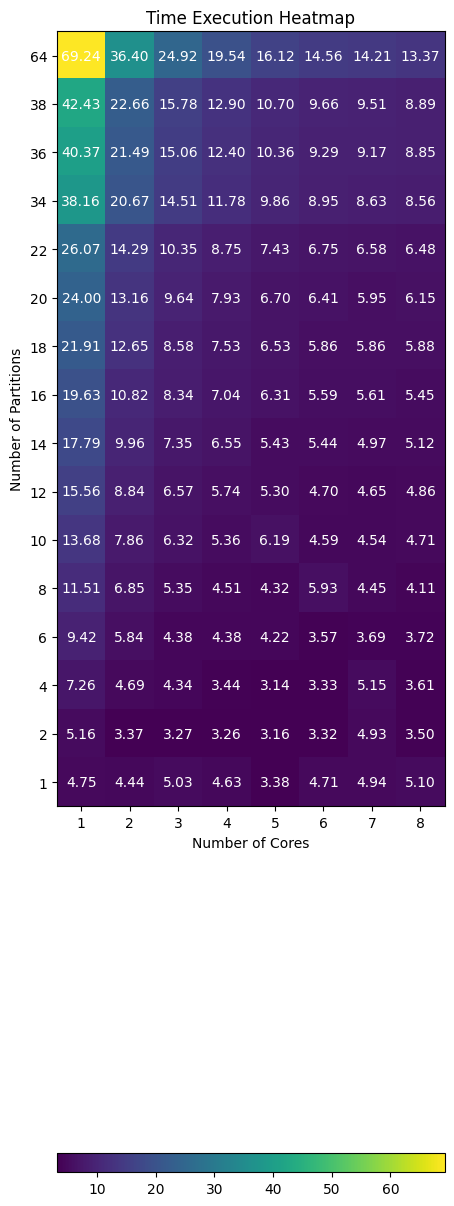

In [10]:

num_partitions1 = num_partitions

num_partitions2 = num_partitions1[::-1]


execution_times1 = execution_times[::-1]

plt.figure(figsize=(5, 30))
plt.imshow(execution_times1, cmap='viridis', interpolation='nearest')



plt.yticks(np.arange(len(num_partitions2)), num_partitions2)
plt.xticks(np.arange(len(num_cores)), num_cores)


plt.xlabel('Number of Cores')
plt.ylabel('Number of Partitions')


plt.title('Time Execution Heatmap')


for i in range(len(num_partitions1)):
    for j in range(len(num_cores)):
        plt.text(j, i, f'{execution_times1[i][j]:.2f}', ha='center', va='center', color='white')

plt.colorbar(orientation='horizontal')


plt.show()




In [11]:
df_spark_tot=pd.concat([df_spark_1,df_spark_2,df_spark_3,df_spark_4,
                  df_spark_5,df_spark_6,df_spark_7,df_spark_8])

df_spark_tot



,Partition,Execution time (s),Time standard deviation (s),Mean Cost Function,Mean Cost Function standard deviation,Number of cores
0,1,4.751723,0.846321,1.964422,0.165298,1
1,2,5.163402,0.038258,2.022995,0.046407,1
2,4,7.264055,0.028834,1.876834,0.100431,1
3,6,9.417521,0.102875,2.183222,0.406273,1
4,8,11.505400,0.118574,1.864446,0.103196,1
...,...,...,...,...,...,...
11,22,6.484680,0.070040,2.004459,0.402078,8
12,34,8.559878,0.059392,1.793413,0.182025,8
13,36,8.854557,0.124427,1.965807,0.325730,8
14,38,8.893776,0.086425,1.856769,0.137508,8


### Scatter-plot Mean Cost Function vs Number of iteration

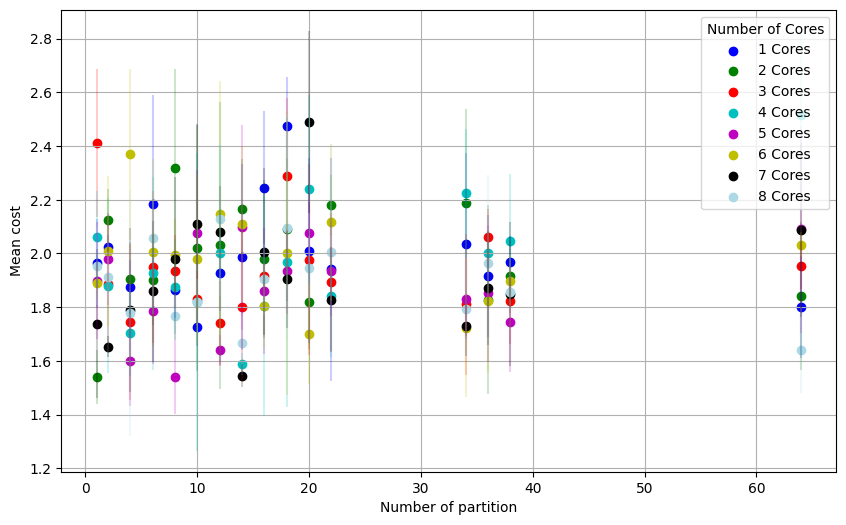

In [12]:
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lightblue']

plt.figure(figsize=(10, 6))
for core, group in df_spark_tot.groupby("Number of cores"):
    partition = group["Partition"]
    mean_cost = group["Mean Cost Function"]
    std_dev = group["Mean Cost Function standard deviation"]
    
    plt.scatter(partition, mean_cost, label=f'{core} Cores', c=colors[int(core)-1], marker='o')
    plt.errorbar(partition, mean_cost, yerr=std_dev, fmt='none', c=colors[int(core)-1],alpha=0.2)
   
plt.xlabel("Number of partition")
plt.ylabel("Mean cost")
plt.legend(title="Number of Cores")

# Mostra il plot
plt.grid()
plt.show()



### Scatter-plot time execution vs number of partition

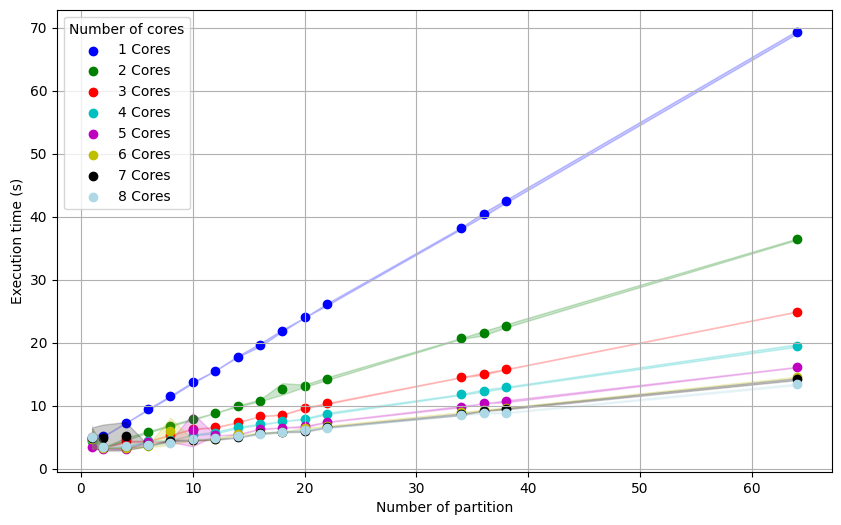

In [13]:
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lightblue']

plt.figure(figsize=(10, 6))
for core, group in df_spark_tot.groupby("Number of cores"):
    partition = group["Partition"]
    execution_time = group["Execution time (s)"]
    std_dev = group["Time standard deviation (s)"]
    
    plt.scatter(partition, execution_time, label=f'{core} Cores ', c=colors[int(core)-1])
    
   
    lower_bound = execution_time - std_dev
    upper_bound = execution_time + std_dev
    
    
    plt.fill_between(partition, lower_bound, upper_bound, color=colors[int(core)-1], alpha=0.2)

plt.xlabel("Number of partition")
plt.ylabel("Execution time (s)")
plt.legend(title="Number of cores")


plt.grid()
plt.show()

# Parallelized Data with RDD and parallelized processes.
As mentioned before, the trend continue to be similar in most of the case but there is some exceptions.

In [14]:
for i in range(1, 9):
    file_name = f'results_rdd_spark_{i}.csv'  
    
    variable_name = f'rdd_spark_{i}'
    locals()[variable_name] = pd.read_csv(file_name)

In [15]:


num_partitions = [1,2,4,6,8,10,12,14,16,18,20,22,34,36,38,64]
num_cores = [1, 2, 3, 4, 5, 6, 7, 8]


execution_times_list = []


for i in range(len(num_partitions)):
    execution_times_list.append(np.array([rdd_spark_1['Execution time (s)'][i], rdd_spark_2['Execution time (s)'][i], 
                                          rdd_spark_3['Execution time (s)'][i], rdd_spark_4['Execution time (s)'][i], 
                                          rdd_spark_5['Execution time (s)'][i], rdd_spark_6['Execution time (s)'][i], 
                                          rdd_spark_7['Execution time (s)'][i], rdd_spark_8['Execution time (s)'][i]]))

# Converte la lista in una matrice 2D 
execution_times = np.array(execution_times_list)







### Heat-map
The heat-map shows an high computational cost for 3 cores compared to other number of cores, this could be cause by a technical problem of the machine, but we can also see a particolar behaviour in the scatter plot.  

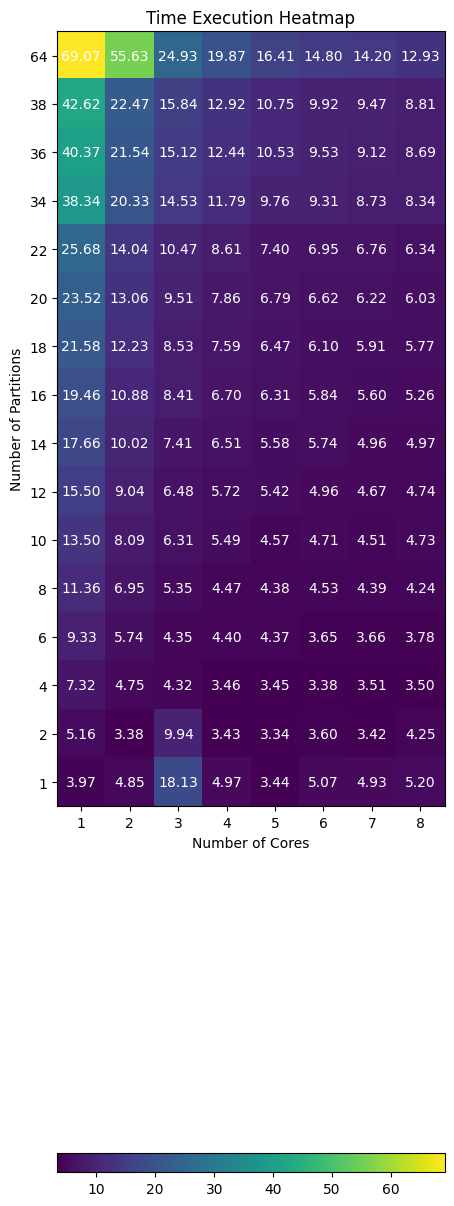

In [16]:

num_partitions1 = num_partitions

num_partitions2 = num_partitions1[::-1]


execution_times1 = execution_times[::-1]

plt.figure(figsize=(5, 30))
plt.imshow(execution_times1, cmap='viridis', interpolation='nearest')



plt.yticks(np.arange(len(num_partitions2)), num_partitions2)
plt.xticks(np.arange(len(num_cores)), num_cores)


plt.xlabel('Number of Cores')
plt.ylabel('Number of Partitions')


plt.title('Time Execution Heatmap')


for i in range(len(num_partitions1)):
    for j in range(len(num_cores)):
        plt.text(j, i, f'{execution_times1[i][j]:.2f}', ha='center', va='center', color='white')

plt.colorbar(orientation='horizontal')


plt.show()





In [17]:
rdd_spark_tot=pd.concat([rdd_spark_1,rdd_spark_2,rdd_spark_3,rdd_spark_4,
                  rdd_spark_5,rdd_spark_6,rdd_spark_7,rdd_spark_8])

rdd_spark_tot

,Partition,Execution time (s),Time standard deviation (s),Mean Cost Function,Mean Cost Function standard deviation,Number of cores
0,1,3.968951,0.009834,2.297640,0.212432,1
1,2,5.158405,0.065499,1.914712,0.285047,1
2,4,7.322456,0.027262,1.752413,0.097835,1
3,6,9.333595,0.061498,1.860435,0.164515,1
4,8,11.356936,0.045722,2.042480,0.086429,1
...,...,...,...,...,...,...
11,22,6.337786,0.199460,2.040060,0.177936,8
12,34,8.341517,0.069820,1.942119,0.085488,8
13,36,8.686370,0.145635,1.998681,0.258174,8
14,38,8.811738,0.080352,1.627527,0.233484,8


### Scatterplot Mean Cost Function vs Number of partition

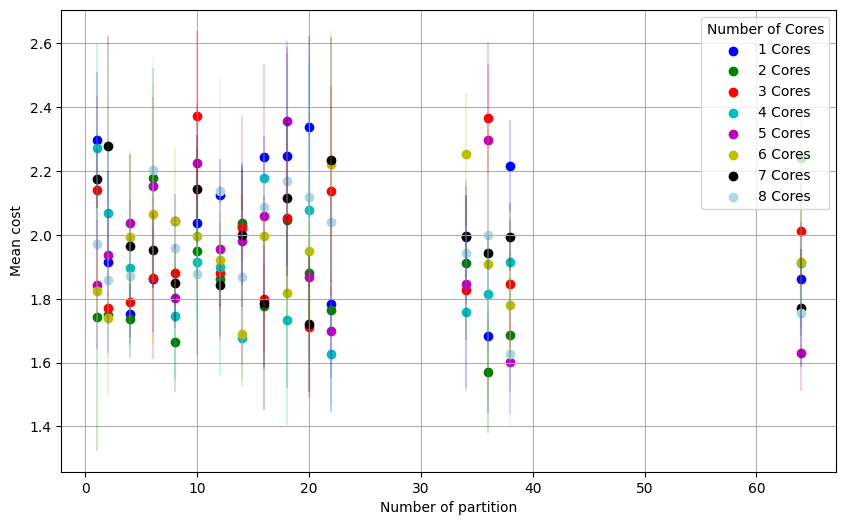

In [18]:
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lightblue']

plt.figure(figsize=(10, 6))
for core, group in rdd_spark_tot.groupby("Number of cores"):
    partition = group["Partition"]
    mean_cost = group["Mean Cost Function"]
    std_dev = group["Mean Cost Function standard deviation"]
    
    plt.scatter(partition, mean_cost, label=f'{core} Cores', c=colors[int(core)-1], marker='o')
    plt.errorbar(partition, mean_cost, yerr=std_dev, fmt='none', c=colors[int(core)-1],alpha=0.2)
   
plt.xlabel("Number of partition")
plt.ylabel("Mean cost")
plt.legend(title="Number of Cores")

# Mostra il plot
plt.grid()
plt.show()




### Scatter-plot Execution Time vs Number of Partition
As mentioned before it can be observed that there is a particolar behaviour not only for 3 cores bat also with standard deviation of 2 cores 64 partition. The heat-map could suggest that this was caused by a tecnical problem, but the fact that what is big is the standard deviation could bring to the thought, that since RDD is less strucured than SparkDataFrame this could bring many possibility for the expected time execution, indeed in some case could be vary fast and some other case slow because it does not update the centroid in a proper way.

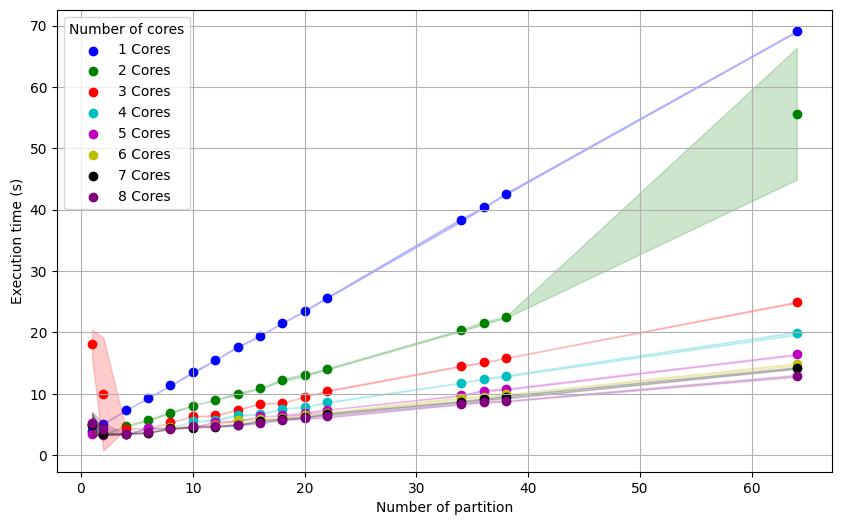

In [24]:
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']

plt.figure(figsize=(10, 6))
for core, group in rdd_spark_tot.groupby("Number of cores"):
    partition = group["Partition"]
    execution_time = group["Execution time (s)"]
    std_dev = group["Time standard deviation (s)"]
    
    plt.scatter(partition, execution_time, label=f'{core} Cores ', c=colors[int(core)-1])
    
    # Calcola i limiti della banda di errore
    lower_bound = execution_time - std_dev
    upper_bound = execution_time + std_dev
    
    # Aggiungi la banda di errore al grafico
    plt.fill_between(partition, lower_bound, upper_bound, color=colors[int(core)-1], alpha=0.2)

plt.xlabel("Number of partition")
plt.ylabel("Execution time (s)")
plt.legend(title="Number of cores")

# Mostra il plot
plt.grid()
plt.show()

## Comparison between time execution of three methods.
Number of cores:8.

The interesting fact here is the difference between array matrix in local machine analyzed by parallelized processes and parallelized dataset and processes. Indeed the execution time is more or less the double with second and third method. The cause is the fact that when the dataset is parallelized, spark has to collect all distributed data for each iteration so it has another task to complete, instead that having all data allocated in the same place.

The advantage to allocate all data in a local machine is the fast performance of the algorithm, and with a dataframe of this dimension is not a problem the overfill of the temporary folder generated by the notebook kernel. Instead with bigger dataframe (such as fetch_rcv1.data dim=(804414,47236) the temporary folder fill herself very fast and the analysis can't go on anymore.

The solution to this problem could be to have a very powerful resources or to distribute data in different machines.


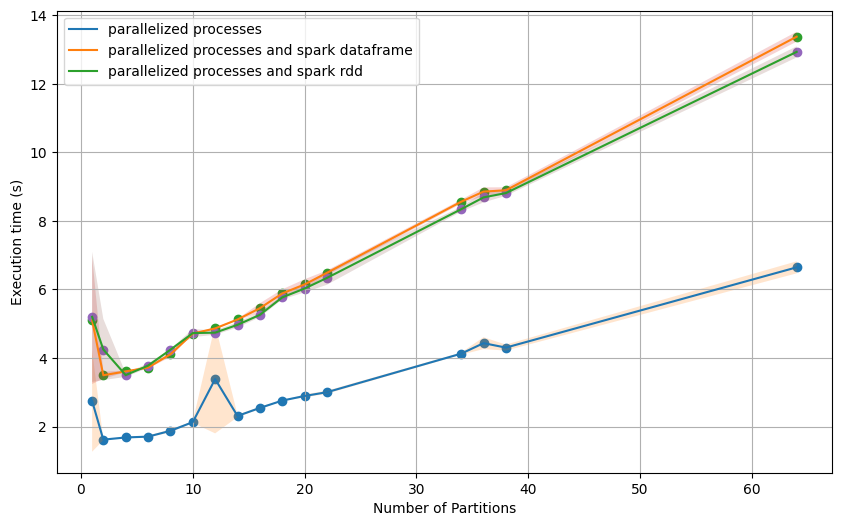

In [25]:
plt.figure(figsize=(10, 6))

# Parallelized Processes
plt.plot(num_partitions, df_results_8['Execution time (s)'], label='parallelized processes')
plt.scatter(num_partitions, df_results_8['Execution time (s)'])
plt.fill_between(num_partitions, 
                 df_results_8['Execution time (s)'] - df_results_8['Time standard deviation (s)'], 
                 df_results_8['Execution time (s)'] + df_results_8['Time standard deviation (s)'], alpha=0.2)

# Parallelized processes and Spark Dataframe
plt.plot(num_partitions, df_spark_8['Execution time (s)'], label='parallelized processes and spark dataframe')
plt.scatter(num_partitions, df_spark_8['Execution time (s)'])
plt.fill_between(num_partitions, 
                 df_spark_8['Execution time (s)'] - df_spark_8['Time standard deviation (s)'], 
                 df_spark_8['Execution time (s)'] + df_spark_8['Time standard deviation (s)'], alpha=0.2)

# Parallelized processes and Spark RDD
plt.plot(num_partitions, rdd_spark_8['Execution time (s)'], label='parallelized processes and spark rdd')
plt.scatter(num_partitions, rdd_spark_8['Execution time (s)'])
plt.fill_between(num_partitions, 
                 rdd_spark_8['Execution time (s)'] - rdd_spark_8['Time standard deviation (s)'], 
                 rdd_spark_8['Execution time (s)'] + rdd_spark_8['Time standard deviation (s)'], alpha=0.2)

plt.legend()
plt.xlabel("Number of Partitions")
plt.ylabel("Execution time (s)")
plt.grid(True)
plt.show()


### Comparison between Spark DataFrame and Spark RDD


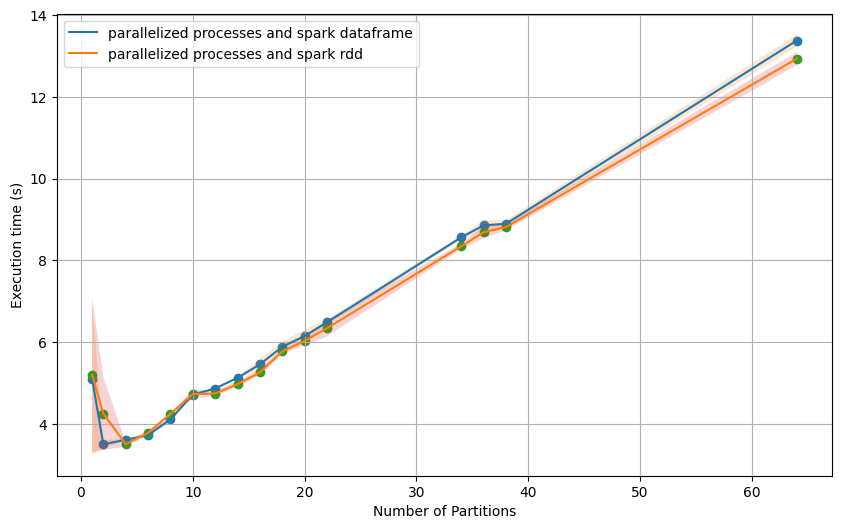

In [27]:
plt.figure(figsize=(10, 6))
# Parallelized processes and Spark Dataframe
plt.plot(num_partitions, df_spark_8['Execution time (s)'], label='parallelized processes and spark dataframe')
plt.scatter(num_partitions, df_spark_8['Execution time (s)'])
plt.fill_between(num_partitions, 
                 df_spark_8['Execution time (s)'] - df_spark_8['Time standard deviation (s)'], 
                 df_spark_8['Execution time (s)'] + df_spark_8['Time standard deviation (s)'], alpha=0.2)

# Parallelized processes and Spark RDD
plt.plot(num_partitions, rdd_spark_8['Execution time (s)'], label='parallelized processes and spark rdd')
plt.scatter(num_partitions, rdd_spark_8['Execution time (s)'])
plt.fill_between(num_partitions, 
                 rdd_spark_8['Execution time (s)'] - rdd_spark_8['Time standard deviation (s)'], 
                 rdd_spark_8['Execution time (s)'] + rdd_spark_8['Time standard deviation (s)'], alpha=0.2)

plt.legend()
plt.xlabel("Number of Partitions")
plt.ylabel("Execution time (s)")
plt.grid(True)
plt.show()



## Mean Squared Error vs Iteration
Here a comparison between the three methods to observe the mean squared error between points and center would decrease as a function of iteration. This has been observed for spark data frame and for spark rdd but not for unparallelized dataset.

In [29]:
itera=np.arange(1,11,1)

mse_df_mean=[0.3257165010526702, 0.2434910215208379, 0.23902546599988336, 0.23570888085877842, 
             0.23580463967853996, 0.2323665199152538, 0.23259276058606235, 0.23209235853582358, 
             0.23267835281982327, 0.23441080468205877]
mse_df_std=[0.07605478065827204, 0.044905086846708596, 0.05052359619134658, 0.043650346075360134, 
            0.042292964183035936, 0.0441313458665705, 0.04875552362737942, 0.04984271773485523, 
            0.04258637691940688, 0.047179569497458745]
mse_rdd_mean=[0.3473453968373965, 0.28943576921213005, 0.2873719642652113, 0.279443090199005, 
              0.2830095017697572, 0.2849167102422084, 0.2810715470169438, 0.286597761127686, 
              0.29193169697680815, 0.2846659550131505]
mse_rdd_std=[0.09103500070504006, 0.04856002399090181, 0.05026793643060061, 0.049969932201146594, 
             0.05141911087026129, 0.04962057216279861, 0.04939599949240323, 0.04055946240878119, 
             0.047502208296862164, 0.04204955843634416]
mse_sc_mean=[2.5000000000000004, 2.6166666666666667, 2.5000000000000004, 2.65, 2.8333333333333335, 
             2.6999999999999997, 2.733333333333333, 2.8166666666666664, 2.85, 2.8000000000000003]
mse_sc_std=[0.14719601443879748, 0.2392116682401222, 0.2677063067368168, 0.14719601443879732, 
            0.37932688922470137, 0.32403703492039304, 0.28674417556808746, 0.08498365855987966, 
            0.14719601443879735, 0.2677063067368168]

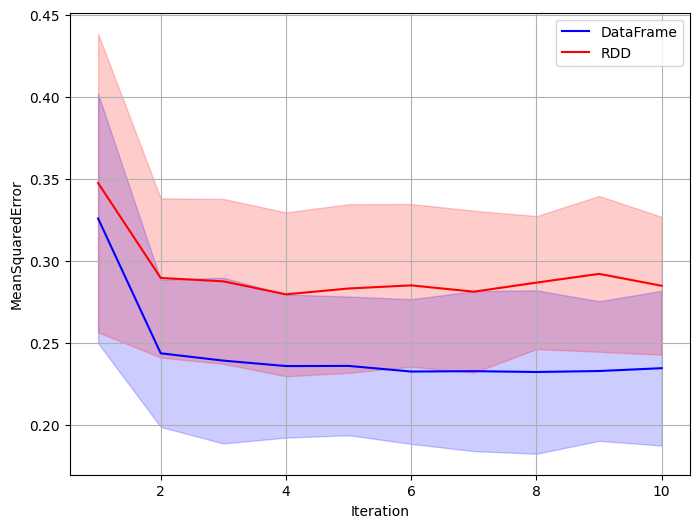

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot delle medie e banda di errore per i dati DataFrame
plt.plot(itera, mse_df_mean, label='DataFrame', color='blue')
plt.fill_between(itera, np.array(mse_df_mean) - np.array(mse_df_std), np.array(mse_df_mean) + np.array(mse_df_std), alpha=0.2, color='blue')

# Plot delle medie e banda di errore per i dati RDD
plt.plot(itera, mse_rdd_mean, label='RDD', color='red')
plt.fill_between(itera, np.array(mse_rdd_mean) - np.array(mse_rdd_std), np.array(mse_rdd_mean) + np.array(mse_rdd_std), alpha=0.2, color='red')


plt.xlabel('Iteration')
plt.ylabel('MeanSquaredError')
plt.legend()
plt.grid()
plt.show()


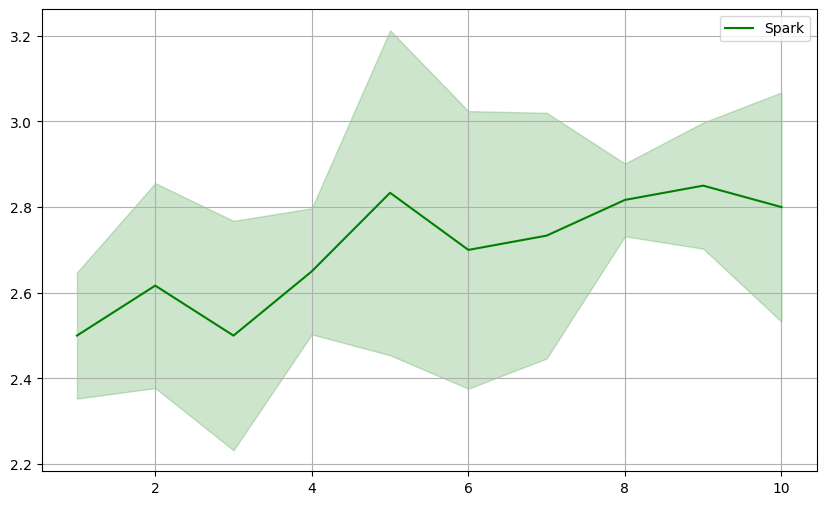

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(itera, mse_sc_mean, label='Spark', color='green')
plt.fill_between(itera, np.array(mse_sc_mean) - np.array(mse_sc_std), np.array(mse_sc_mean) + np.array(mse_sc_std), alpha=0.2, color='green')

plt.legend()
plt.grid(True)
plt.show()